In [ ]:
import numpy as np
#for the following statement to compile successfully, you need the scikit-learn package.

from sklearn.datasets import load_digits #for loading digits dataset

np.random.seed(1000) #for reproducibility
digits = load_digits()
#check the shape of digits data features
print('digits data shape:', digits.data.shape)
A = digits.data
#check the shape of digits target labels
print('digits target shape:', digits.target.shape)
#We can print first 5 samples of digits data and check
print('Features of first five samples of digits data:')
print(A[:,])

digits data shape: (1797, 64)
digits target shape: (1797,)
Features of first five samples of digits data:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
#How many labels does digits data have?
#print the unique classes
print('unique classes: ',np.unique(digits.target))
n = digits.data.shape[0] #Number of data points or samples
d = digits.data.shape[1] #Dimension of data points

unique classes:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
#In the following code, we create a nx1 vector of target labels
y = 1.0*np.ones([A.shape[0],1])
# print ('y',y)
for i in range(digits.target.shape[0]):
    if digits.target[i] == 0:
        y[i] = 1
    else:
        y[i] = -1

In [ ]:
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices
#print('shuffled indices of samples:')
#print(indexarr)

In [ ]:
#Use the samples corresponding to first 80% of indexarr for training
num_train = int(0.8*n)
#Use the remaining 20% samples for testing
num_test = n-num_train
print('num_train: ',num_train, 'num_test: ', num_test)

num_train:  1437 num_test:  360


In [ ]:
#Use the first 80% of indexarr to create the train data features and train labels
train_features = A[indexarr[0:num_train]]
train_label = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_features.shape)
print('shape of train data labels')
print(train_label.shape)

shape of train data features:
(1437, 64)
shape of train data labels
(1437, 1)


In [ ]:
#Use remaining 20% of indexarr to create the test data and test labels
test_features = A[indexarr[num_train:n]]
test_label = y[indexarr[num_train:n]]
print('shape of test data features:')
print(test_features.shape)
print('shape of test data labels')
print(test_label.shape)

shape of test data features:
(360, 64)
shape of test data labels
(360, 1)


[Text(0.5, 0.8333333333333334, 'x[36] <= 0.5\nentropy = 0.459\nsamples = 1437\nvalue = [1298, 139]'),
 Text(0.25, 0.5, 'x[28] <= 5.0\nentropy = 0.964\nsamples = 221\nvalue = [86, 135]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.539\nsamples = 154\nvalue = [19, 135]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 67\nvalue = [67, 0]'),
 Text(0.75, 0.5, 'x[36] <= 3.5\nentropy = 0.032\nsamples = 1216\nvalue = [1212, 4]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.286\nsamples = 80\nvalue = [76, 4]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1136\nvalue = [1136, 0]')]

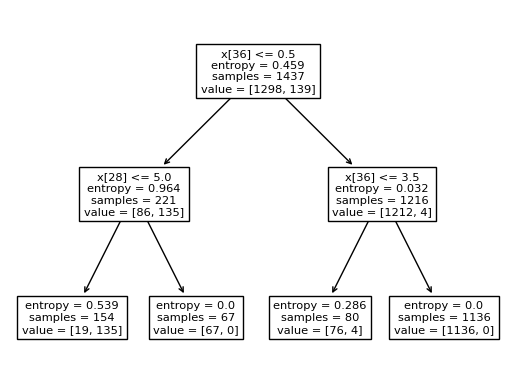

In [ ]:
from sklearn import tree #decision tree from scikit learn

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
#train using decision tree classifier and plot the resultant decision tree
tree.plot_tree(clf.fit(train_features, train_label))



Let's verify the entropy using formula discussed in the previous class.

**Entropy at root node**

$
\begin{align*}
& = -P(y = 1)\log_2(P(y = 1)) - P(y = -1)\log_2(P(y = -1))  \\
& = -\frac{1298}{1437}\log_2\left(\frac{1298}{1437} \right) - \frac{139}{1437}\log_2\left(\frac{139}{1437} \right) \\
& = 0.459
\end{align*}
$

**Entropy at node $x[36] \leq 0.5$**

$
\begin{align*}
& = -P(y = 1|x[36] \leq 0.5)\log_2(P(y = 1|x[36] \leq 0.5)) - P(y = -1|x[36] \leq 0.5)\log_2(P(y = -1)|x[36] \leq 0.5)  \\
& = -\frac{86}{221}\log_2\left(\frac{86}{221} \right) - \frac{135}{221}\log_2\left(\frac{135}{221} \right) \\
& = 0.964
\end{align*}
$

**Entropy at node $x[36] > 0.5$**

$
\begin{align*}
& = -P(y = 1|x[36] > 0.5)\log_2(P(y = 1|x[36] > 0.5)) - \left(P(y = -1|x[36] > 0.5)\log_2(P(y = -1|x[36] > 0.5)\right) \\
& = -\frac{1212}{1216}\log_2\left(\frac{1212}{1216} \right) - \frac{4}{1216}\log_2\left(\frac{4}{1216} \right) \\
& = 0.032
\end{align*}
$

What is gini index? Let's see it on an example with depth 2

[Text(167.4, 181.2, 'X[36] <= 0.5\ngini = 0.175\nsamples = 1437\nvalue = [1298, 139]'),
 Text(83.7, 108.72, 'X[28] <= 2.5\ngini = 0.475\nsamples = 221\nvalue = [86, 135]'),
 Text(41.85, 36.23999999999998, 'gini = 0.182\nsamples = 148\nvalue = [15, 133]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.053\nsamples = 73\nvalue = [71, 2]'),
 Text(251.10000000000002, 108.72, 'X[36] <= 3.5\ngini = 0.007\nsamples = 1216\nvalue = [1212, 4]'),
 Text(209.25, 36.23999999999998, 'gini = 0.095\nsamples = 80\nvalue = [76, 4]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 1136\nvalue = [1136, 0]')]

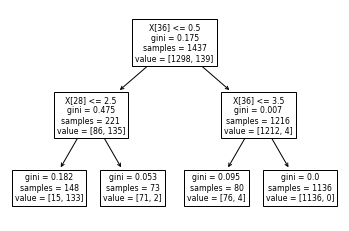

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=2)
#train using decision tree classifier and plot the resultant decision tree
tree.plot_tree(clf.fit(train_features, train_label))

**Gini index at root node**

$
\begin{align*}
& = 1-\left(P^2(y = 1) + P^2(y = -1) \right) \\
& = 1- \left( \left( \frac{1298}{1437} \right)^2 + \left( \frac{139}{1437} \right)^2 \right) \\
& = 0.175
\end{align*}
$

**Gini index at node $x[36] \leq 0.5$**

$
\begin{align*}
& = 1-\left((P(y = 1)|x[36] \leq 0.5))^2 + (P(y = -1)|x[36] \leq 0.5))^2 \right) \\
& = 1- \left( \left( \frac{86}{221} \right)^2 + \left( \frac{135}{221} \right)^2 \right) \\
& = 0.475
\end{align*}
$

**Gini index at node $x[36] > 0.5$**

$
\begin{align*}
& = 1-\left((P(y = 1)|x[36] > 0.5))^2 + (P(y = -1)|x[36] > 0.5))^2 \right) \\
& = 1- \left( \left( \frac{1212}{1216} \right)^2 + \left( \frac{4}{1216} \right)^2 \right) \\
& = 0.007
\end{align*}
$

We can see that gini index is easier to compute as compared to entropy. Next, we will see if there is any difference in the train and test accuracy using gini and entropy criteria.

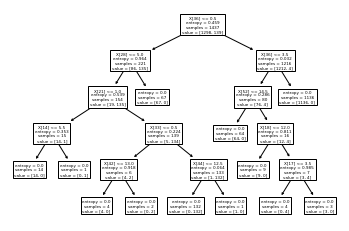

In [ ]:
## running decision tree with entropy criterion for different depths
maximum_depth = [1,2,5,10,15,20]
train_accuracy_entropy = []
test_accuracy_entropy = []
for i in maximum_depth:
  #create a decision tree classifier with 'entropy' as criterion
  clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
  #train using decision tree classifier and plot the resultant decision tree
  tree.plot_tree(clf.fit(train_features, train_label))
  #Get the trained model in clf_model
  clf_model = clf.fit(train_features,train_label)
  #We will now use the trained model for predition on the test data set
  predicted_labels = clf_model.predict(test_features)
  #reshaping predicted_labels so that it is of the same shape as test_label
  predicted_labels = np.reshape(predicted_labels.data,(num_test,1))
  #If you wish to see how predicted_labels and test_label look, you can print them and check
  #print(predicted_labels)
  #print(test_label)
  #compute test set error and test set accuracy
  test_error = np.sum(0.5*np.abs(predicted_labels-test_label))/len(test_label)*100.0 #Try to understand this equation
  test_accuracy = 100.0-test_error
  test_accuracy_entropy.append(test_accuracy)
  #print the test set accuracy
  # print('test set accuracy using gini:', test_accuracy_gini)
  #We can also use the trained model clf_model to predict the train set
  predicted_train_labels = clf_model.predict(train_features)
  #reshaping predicted_train_labels so that it is of the same shape as train_label
  predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
  #compute train set error and train set accuracy
  train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
  train_accuracy = 100.0-train_error
  train_accuracy_entropy.append(train_accuracy)


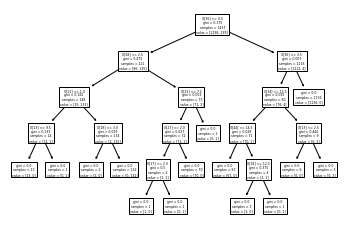

In [ ]:
## running decision tree with gini criterion for different depths
train_accuracy_gini = []
test_accuracy_gini = []
for i in maximum_depth:
  #create a decision tree classifier with 'entropy' as criterion
  clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=i)
  #train using decision tree classifier and plot the resultant decision tree
  tree.plot_tree(clf.fit(train_features, train_label))
  #Get the trained model in clf_model
  clf_model = clf.fit(train_features,train_label)
  #We will now use the trained model for predition on the test data set
  predicted_labels = clf_model.predict(test_features)
  #reshaping predicted_labels so that it is of the same shape as test_label
  predicted_labels = np.reshape(predicted_labels.data,(num_test,1))
  #If you wish to see how predicted_labels and test_label look, you can print them and check
  #print(predicted_labels)
  #print(test_label)
  #compute test set error and test set accuracy
  test_error = np.sum(0.5*np.abs(predicted_labels-test_label))/len(test_label)*100.0 #Try to understand this equation
  test_accuracy = 100.0-test_error
  test_accuracy_gini.append(test_accuracy)
  #print the test set accuracy
  # print('test set accuracy using gini:', test_accuracy_gini)
  #We can also use the trained model clf_model to predict the train set
  predicted_train_labels = clf_model.predict(train_features)
  #reshaping predicted_train_labels so that it is of the same shape as train_label
  predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
  #compute train set error and train set accuracy
  train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
  train_accuracy = 100.0-train_error
  train_accuracy_gini.append(train_accuracy)


In [ ]:
print ('train accuracy using entropy:')
print (train_accuracy_entropy)
print ('train accuracy using gini')
print (train_accuracy_gini)
print ('test accuracy using entropy')
print (test_accuracy_entropy)
print ('test accuracy using gini')
print (test_accuracy_gini)

train accuracy using entropy:
[93.73695198329854, 98.39944328462074, 100.0, 100.0, 100.0, 100.0]
train accuracy using gini
[93.73695198329854, 98.53862212943632, 100.0, 100.0, 100.0, 100.0]
test accuracy using entropy
[95.83333333333333, 99.16666666666667, 99.44444444444444, 99.72222222222223, 99.72222222222223, 99.72222222222223]
test accuracy using gini
[95.83333333333333, 99.16666666666667, 99.16666666666667, 98.88888888888889, 99.16666666666667, 99.16666666666667]


In [ ]:
from sklearn.metrics import confusion_matrix

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
# tree.plot_tree(clf.fit(train_features, train_label))
clf_model = clf.fit(train_features,train_label)
predicted_test_labels = clf_model.predict(test_features)

cm = confusion_matrix(test_label, predicted_test_labels)
print(cm)

[[320   1]
 [  1  38]]


[Text(0, 0.5, '-1'), Text(0, 1.5, '1')]

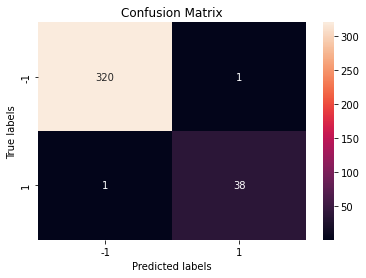

In [ ]:
#Plotting the confusion matrix for better interpretation
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['-1', '1'])
ax.yaxis.set_ticklabels(['-1', '1'])

In order to deal with *imbalanced data*, we can look at the following:


*   True Positive  (TP)
*   True Negative  (TN)
*   False Positive (FP)
*   False Negative (FN).

Based on the above classes, the following can be defined:
$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
$$F-Measure = 2\frac{Precision\times Recall}{Precision + Recall}$$
$$ Support = \text{Number of occurences of each class in true label set} $$

Note: All the expressions are based on the existence of a positive class and a negative class.






In [ ]:
from sklearn.metrics import classification_report
test_cr = classification_report(test_label, predicted_test_labels)
print("Test Report:")
print(test_cr)

Test Report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       321
         1.0       0.97      0.97      0.97        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
test_cr = precision_recall_fscore_support(test_label, predicted_test_labels)
print("Test Report:")
print(test_cr)

Test Report:
(array([0.99688474, 0.97435897]), array([0.99688474, 0.97435897]), array([0.99688474, 0.97435897]), array([321,  39]))
